# Ski Resort Modeling Example Project

---

## Overview

This is an example project using the Data Science Method as defined below. It was originally completed for the Springboard Unit 6 project.

### The Data Science Method

1. **Problem Identification**

2. **Data Wrangling**
   1. Data Collection 
   2. Data Organization
   3. Data Definition 
   4. Data Cleaning
3. **Exploratory Data Analysis**
   1. Build data profile tables and plots
     1. Outliers & Anomalies
   2. Explore data relationships
   3. Identification and creation of features
4. **Pre-processing and Training Data Development**
   1. Create dummy or indicator features for categorical variables
   2. Standardize the magnitude of numeric features
   3. Split into testing and training datasets
   4. Apply scaler to the testing set
5. **Modeling**
   1. Fit Models with Training Data Set
   2. Review Model Outcomes — Iterate over additional models as needed.
   3. Identify the Final Model
6. **Documentation**
   1. Review the Results
   2. Present and share your findings - Storytelling
   3. Finalize Code 
   4. Finalize Documentation

## 1. Problem Identification

### Problem statement

How can Big Mountain Resort recuperate $1.54 million in operating expenses during this ski season while maintaining a profit margin of 9.2%?

### Context

Big Mountain Resort has recently installed an additional chair lift to help increase the distribution of visitors across the mountain. This additional chair increases their operating costs by $1,540,000 this season. Every year about 350,000 people ski or snowboard at Big Mountain. The business is eager to get recommendations on recouping the increased operating costs from the new chair this season.

### Criteria for success

Recoup at least $1.54 million during this season. Additionally, determine this year's annual revenue if recommendations are implemented.

### Scope of solution space

Limited to this current season and only Big Mountain Resort.

### Constraints within solution space

- Maintain profit margin at 9.2% or above
- Only have a limited number of features which we can change

### Stakeholders

- Director of Operations
- Database Manager

### Key data sources

- CSV

## 2. Data Wrangling

### Environment Setup

In [1]:
#Load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.cluster import KMeans

%matplotlib inline

os.listdir(os.getcwd())

['updated_ski_data.csv',
 '.DS_Store',
 'GuidedCapstone_Step4_and_Step5.ipynb',
 'updated_ski_data.numbers',
 'models',
 'figures',
 'GuidedCapstone_Step3.ipynb',
 'GuidedCapstone_Step4.ipynb',
 '.ipynb_checkpoints',
 'GuidedCapstone_Step6.ipynb',
 'data',
 'GuidedCapstone_Step2.ipynb',
 'GuidedCapstone_Full.ipynb']

In [2]:
resort = 'Whitefish'

### Data Collection

In [3]:
# Load the data
df = pd.read_csv('./updated_ski_data.csv')
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


### Data Organization

At a minimum, the following directories should be created: `data/`, `figures/`, and `models/`

In [4]:
# Uncomment, if needed
# os.mkdir('data')
# os.mkdir('figures')
# os.mkdir('models')

### Data Definition

In [5]:
df.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [6]:
df.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [8]:
# Count the non-null values
df.count()

Name                 330
Region               330
state                330
summit_elev          330
vertical_drop        330
base_elev            330
trams                330
fastEight            164
fastSixes            330
fastQuads            330
quad                 330
triple               330
double               330
surface              330
total_chairs         330
Runs                 326
TerrainParks         279
LongestRun_mi        325
SkiableTerrain_ac    327
Snow Making_ac       284
daysOpenLastYear     279
yearsOpen            329
averageSnowfall      316
AdultWeekday         276
AdultWeekend         279
projectedDaysOpen    283
NightSkiing_ac       187
dtype: int64

In [9]:
# Percent of unique values per column
df.nunique() / 330 * 100

Name                 99.696970
Region               11.515152
state                10.606061
summit_elev          80.606061
vertical_drop        58.484848
base_elev            73.939394
trams                 1.515152
fastEight             0.606061
fastSixes             2.121212
fastQuads             4.242424
quad                  2.121212
triple                2.727273
double                3.030303
surface               3.636364
total_chairs          9.393939
Runs                 33.333333
TerrainParks          3.333333
LongestRun_mi        12.727273
SkiableTerrain_ac    58.484848
Snow Making_ac       43.333333
daysOpenLastYear     33.636364
yearsOpen            21.818182
averageSnowfall      32.424242
AdultWeekday         25.151515
AdultWeekend         24.545455
projectedDaysOpen    27.272727
NightSkiing_ac       23.636364
dtype: float64

In [10]:
df['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
New Hampshire          16
Wisconsin              16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
North Carolina          6
Oregon                  6
Salt Lake City          6
Connecticut             5
Ohio                    5
Mt. Hood                4
West Virginia           4
Illinois                4
Virginia                4
Iowa                    3
Alaska                  3
Arizona                 2
Nevada                  2
Missouri                2
New Jersey              2
South Dakota            2
Indiana                 2
Tennessee               1
Rhode Island            1
Northern California     1
Maryland                1
Name: Region

In [11]:
df['state'].value_counts()

New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
Wisconsin         16
New Hampshire     16
Vermont           15
Minnesota         14
Utah              13
Montana           12
Idaho             12
Massachusetts     11
Washington        10
Oregon            10
Maine              9
New Mexico         9
Wyoming            8
North Carolina     6
Connecticut        5
Ohio               5
Virginia           4
West Virginia      4
Illinois           4
Nevada             4
Alaska             3
Iowa               3
New Jersey         2
Missouri           2
Arizona            2
South Dakota       2
Indiana            2
Tennessee          1
Rhode Island       1
Maryland           1
Name: state, dtype: int64

In [12]:
# Range of values for each column
df.agg([min, max]).T

,min,max
Name,49 Degrees North,Yosemite Ski & Snowboard Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,315,13487
vertical_drop,60,4425
base_elev,70,10800
trams,0,4
fastEight,0,1
fastSixes,0,6
fastQuads,0,15


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


### Data Cleaning

In [14]:
# Percent of null values
null_values = pd.DataFrame(df.isnull().sum().sort_values(ascending=False) / len(df), columns=['percent'])
positive_values = null_values['percent'] > 0
null_values[positive_values]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


In [15]:
# Calculate missing `fastEight` values based on other tram values and total
chair_lift_sum = df[['trams', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface']].sum(axis=1)
df['calculatedEight'] = df['total_chairs'] - chair_lift_sum
df['calculatedEight'].value_counts()

0    329
1      1
Name: calculatedEight, dtype: int64

In [16]:
# Null values seem to equal zero
df.drop(columns='calculatedEight', inplace=True)
df['fastEight'].fillna(0, inplace=True)

In [17]:
# Fill these columns with zero because these features are either have or have not (there is no try)
df['TerrainParks'].fillna(0, inplace=True)
df['Snow Making_ac'].fillna(0, inplace=True)
df['NightSkiing_ac'].fillna(0, inplace=True)
df['yearsOpen'].fillna(0, inplace=True)
df['SkiableTerrain_ac'].fillna(0, inplace=True)

In [18]:
# Fill these columns with mean values because they are unlikely to be zero and just missing
df['AdultWeekday'].fillna((df['AdultWeekday'].mean()), inplace=True)
df['AdultWeekend'].fillna((df['AdultWeekend'].mean()), inplace=True)
df['daysOpenLastYear'].fillna((df['daysOpenLastYear'].mean()), inplace=True)
df['projectedDaysOpen'].fillna((df['projectedDaysOpen'].mean()), inplace=True)
df['averageSnowfall'].fillna((df['averageSnowfall'].mean()), inplace=True)
df['LongestRun_mi'].fillna((df['LongestRun_mi'].mean()), inplace=True)
df['Runs'].fillna((df['Runs'].mean()), inplace=True)

In [19]:
# Check for duplicate rows
df[df.duplicated()]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [20]:
df.to_csv('data/step2_output.csv')

## 3. Exploratory Data Analysis

## Build data profile tables and plots

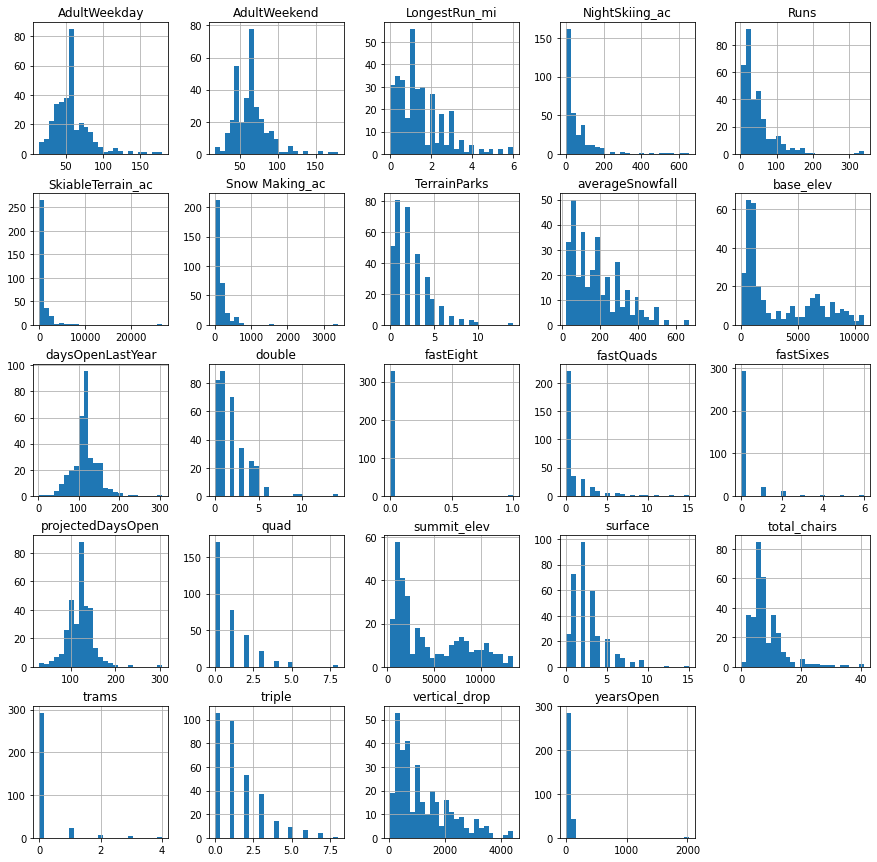

In [21]:
df.hist(bins=25, figsize=(15,15))
plt.show()

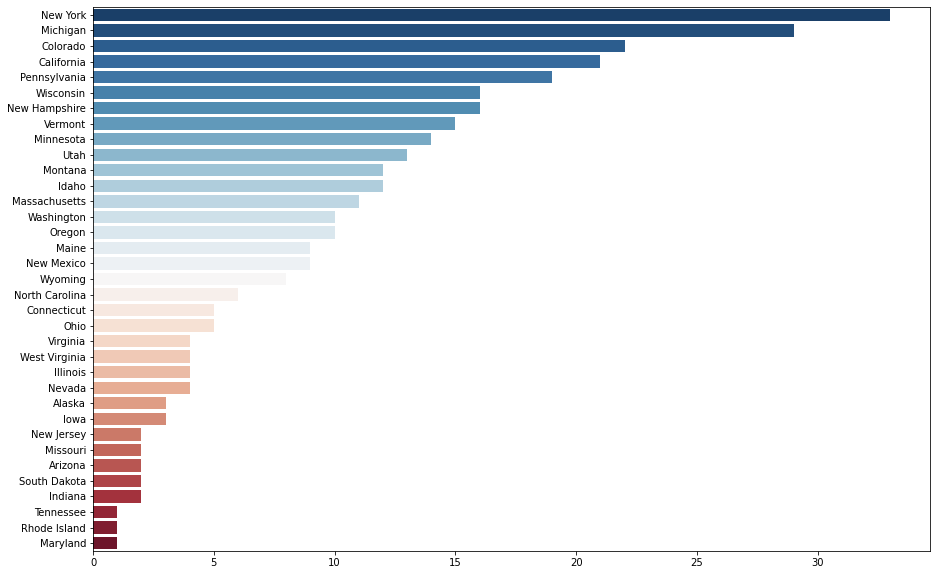

In [22]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['state'].value_counts())
names = list(x.index)
values = list(x['state'])
sns.barplot(x=values, y=names, palette="RdBu_r")

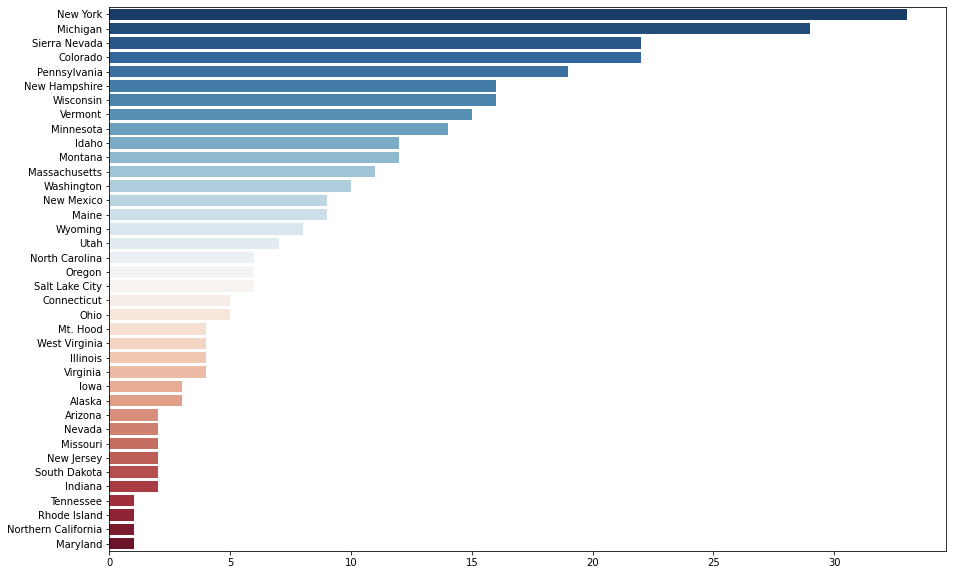

In [23]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Region'].value_counts())
names = list(x.index)
values = list(x['Region'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [24]:
df.drop(columns='Region', inplace=True)

### Outliers & Anomalies

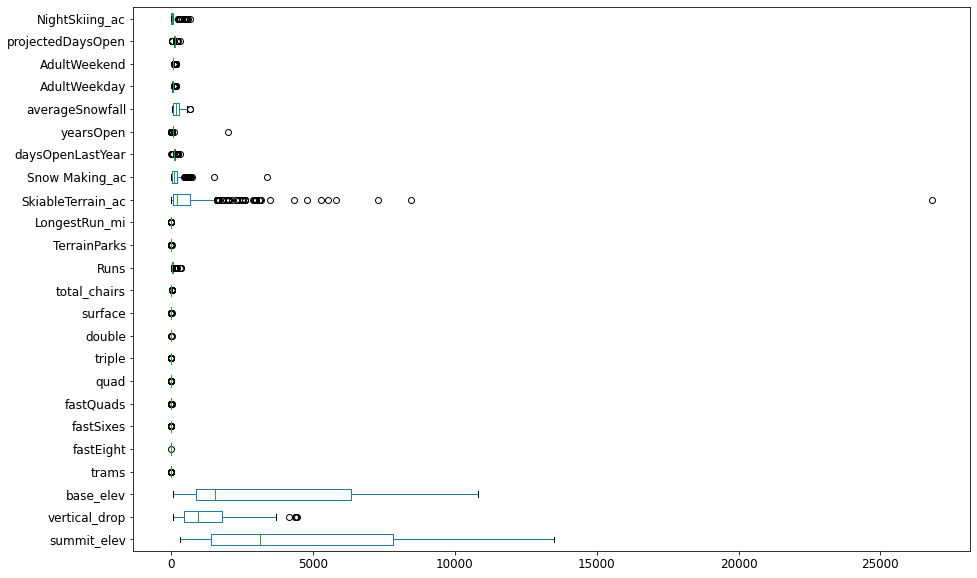

In [25]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=12, figsize=(15,10))

In [26]:
# The `SkiableTerrain_ac` outlier is a bit extreme
df[df['SkiableTerrain_ac'] > 25000]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,13487,3087,10400,0,0.0,0,0,0,...,1.5,26819.0,0.0,175.0,17.0,400.0,79.0,79.0,181.0,0.0


In [27]:
# The rest of the data looks okay, but the Skiable Terrain is not accurate
# So as not to lose the entire observation, I'm going to replace the outlier value with Wikipedia value
df.loc[df['Name'] == 'Silverton Mountain','SkiableTerrain_ac'] = 1819
df.loc[df['Name'] == 'Silverton Mountain','SkiableTerrain_ac']

39    1819.0
Name: SkiableTerrain_ac, dtype: float64

In [28]:
# The `yearsOpen` outlier is a bit extreme
df[df['yearsOpen'] > 500]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
115,Pine Knob Ski Resort,Michigan,1308,300,1009,0,0.0,0,0,0,...,1.0,80.0,80.0,115.103943,2019.0,185.316456,49.0,57.0,120.053004,0.0


In [29]:
# Looks like an established date. We'll treat as a null.
df.loc[df['Name'] == 'Pine Knob Ski Resort','yearsOpen'] = 0
df.loc[df['Name'] == 'Pine Knob Ski Resort','yearsOpen']

115    0.0
Name: yearsOpen, dtype: float64

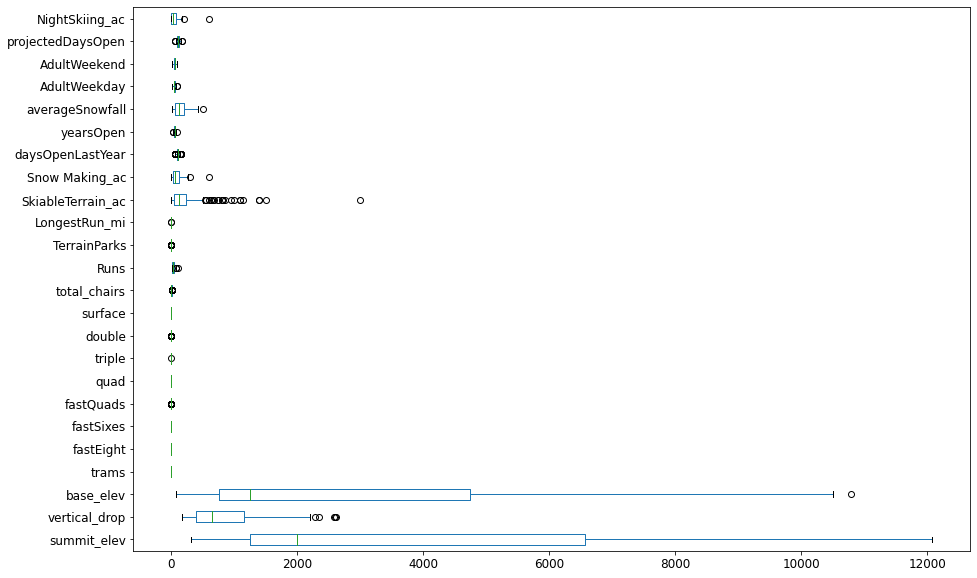

In [30]:
# Interquartile range, or IQR. This is equal to Q3 - Q1. 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Create new dataframe with only values around the IQR
# Ensure the resort in question isn't removed
dfno = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1) | df['Name'].str.startswith(resort)]

dfno.boxplot(grid=False, vert=False, fontsize=12, figsize=(15,10))

In [31]:
dfno.shape

(172, 26)

In [32]:
df.shape

(330, 26)

The IQR outlier removal is too drastic and the outliers aren't exceptionally unrealistic, so we're going to stick with our original dataframe.

In [33]:
# Uncomment if going through with IQR removal
# df = dfno

**We'll focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year.** In this case, we need to investigate the expected lift ticket price for Whitefish based on all the other given resort characteristics. In addition, we want to predict the number of days the resort will be open each season.

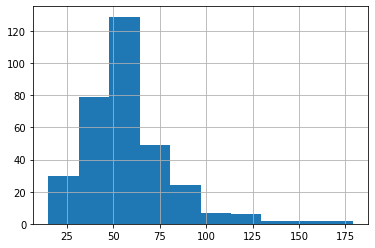

In [34]:
# Create histograms for features of interest
df['AdultWeekday'].hist()

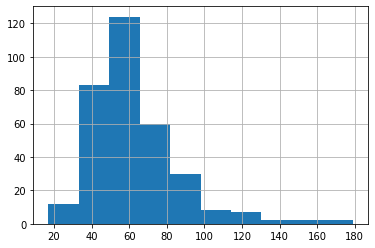

In [35]:
df['AdultWeekend'].hist()

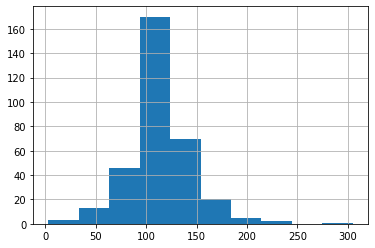

In [36]:
df['daysOpenLastYear'].hist()

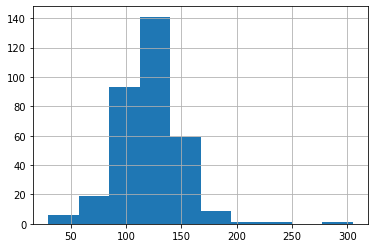

In [37]:
df['projectedDaysOpen'].hist()

### Explore data relationships

In [38]:
# NOTE: This takes a while to complete
# pairplots = sns.pairplot(df)

### Identification and creation of features

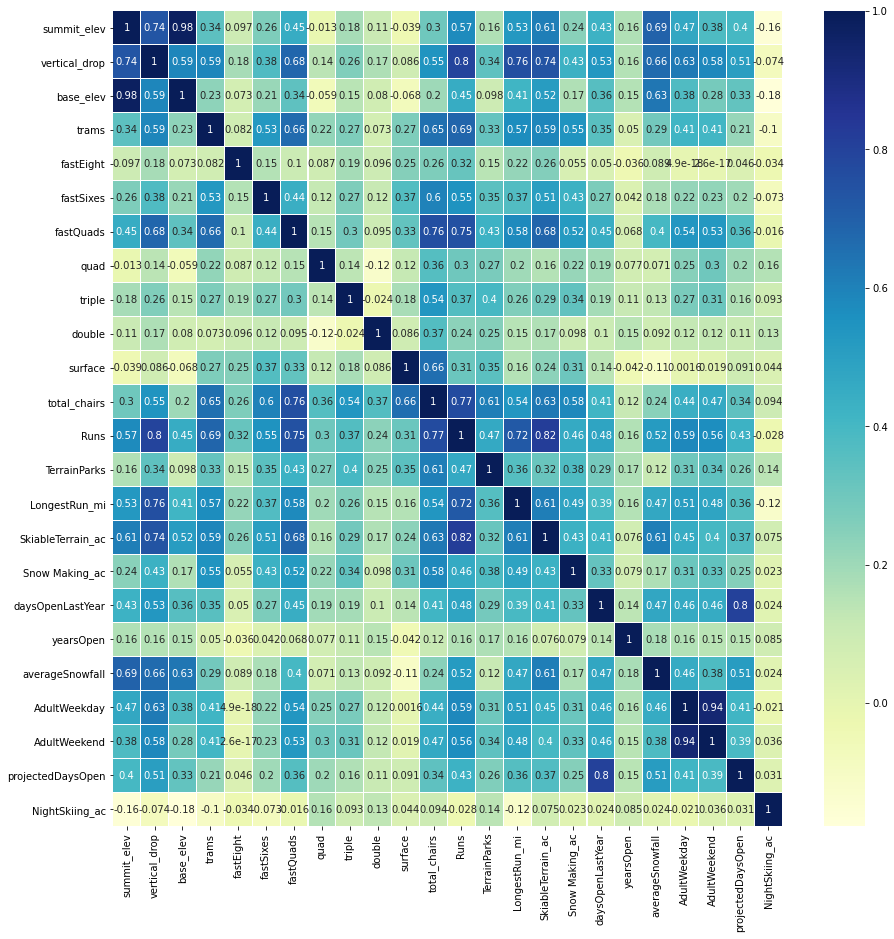

In [39]:
# Calculate the correlation coefficients
corr = df.corr()

# Seaborn (prettier)
plt.figure(figsize=(15,15))
plt.yticks(rotation=0)
sns.heatmap(corr, linewidths=.1, cmap="YlGnBu", annot=True)

In [40]:
# Remove possible collinear features

# Create correlation matrix
# Retain our response variables
corr_matrix = df.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Iterate through our columns and gather all indices of values which that have a correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Features selected to drop include:', to_drop)
print('Reduced dataframe size: ', df.drop(df[to_drop], axis=1).shape)

Features selected to drop include: ['base_elev']
Reduced dataframe size:  (330, 25)


In [41]:
# Uncomment to go ahead with dropping collinear features
# df = df.drop(df[to_drop], axis=1)

In [42]:
df.to_csv('data/step3_output.csv')

## Pre-processing and Training Data Development

### Create dummy or indicator features for categorical variables

In [43]:
# Get the dummies or indicators for categorical features
categorical_columns = ['state']
indicators = pd.get_dummies(df[categorical_columns])

# Create new dataframe to store with dummies
df_dummies = pd.concat([df, indicators], axis=1)
df_dummies.drop(columns=categorical_columns, inplace=True)

In [44]:
df_dummies.head()

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0


## Modeling

### Model 1 - Include dummy features, no feature dropping

In [45]:
x = df_dummies.drop(['Name','AdultWeekend'], axis=1)
y = df['AdultWeekend']

In [46]:
# Standardize the magnitude of numeric features
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
y = y.ravel()

In [47]:
# Split into testing and training datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [48]:
# Fit model
lr_model = LinearRegression()
model = lr_model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9331527641567453

In [49]:
# Predictions for model evaluation
y_pred = model.predict(x_test)

# Explained Varience Score (r-squared)
evs = explained_variance_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"The explained variance score is {evs}")
print(f"The mean absolute error is {mae}")

The explained variance score is 0.9332560878232318
The mean absolute error is 5.149816284561599


In [50]:
model.intercept_

64.09818677495056

In [51]:
# Create dataframe for coefficients
coef_df = pd.DataFrame(abs(model.coef_), x.columns, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
total_chairs,9.586052e+12
fastQuads,3.634094e+12
surface,3.404874e+12
double,3.000501e+12
triple,2.676653e+12
state_New York,2.246688e+12
quad,2.169328e+12
state_Michigan,2.120263e+12
state_Colorado,1.868075e+12
state_California,1.828085e+12


**NOTE: This is an example of when linear regression doesn't do a great job. The coefficients are too big and contain things that we can't really change, like the state dummy/indicator features. In this case, we don't need the dummy features and can also continue to drop other unnecessary features for our analysis.**

### Model 2 - No dummy features, drop `state` feature

In [52]:
# NOTE: We're not using the dummy features for this model
x = df.drop(['Name','AdultWeekend', 'state'], axis=1)
y = df['AdultWeekend']

In [53]:
# Scale and ravel
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
y = y.ravel()

In [54]:
# Split into testing and training datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [55]:
# Fit model
lr_model = LinearRegression()
model = lr_model.fit(x_train, y_train)
score = model.score(x_test, y_test)

print(f"The model score is {score}")

The model score is 0.9134406465094611


In [56]:
# Predictions for model evaluation
y_pred = model.predict(x_test)

# Explained Varience Score (r-squared)
evs = explained_variance_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"The explained variance score is {evs}")
print(f"The mean absolute error is {mae}")

The explained variance score is 0.9141619327465611
The mean absolute error is 5.907040931676278


In [57]:
# Create dataframe for coefficients
coef_df = pd.DataFrame(abs(model.coef_), x.columns, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
AdultWeekday,19.894031
summit_elev,13.677631
base_elev,11.031856
vertical_drop,4.899866
SkiableTerrain_ac,4.002152
triple,1.429355
daysOpenLastYear,1.346644
quad,1.306046
surface,1.253883
fastQuads,1.213577


### Model 3 - No dummy features, drop `state`, `base_elev`, and `summit_elev` features

In [58]:
# NOTE: We're not using the dummy features for this model
x = df.drop(['Name','AdultWeekend', 'state', 'base_elev', 'summit_elev'], axis=1)
y = df['AdultWeekend']

In [59]:
# Scale and ravel
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
y = y.ravel()

In [80]:
x_scaled.reshape(-1,1)

array([[ 1.35728620e+00],
       [ 1.47965850e+00],
       [-5.51317846e-02],
       ...,
       [ 0.00000000e+00],
       [-9.90324405e-16],
       [-6.09611897e-01]])

In [60]:
# Split into testing and training datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [61]:
# Fit model
lr_model = LinearRegression()
model = lr_model.fit(x_train, y_train)
score = model.score(x_test, y_test)

print(f"The model score is {score}")

The model score is 0.9142805555862434


In [62]:
# Predictions for model evaluation
y_pred = model.predict(x_test)

# Explained Varience Score (r-squared)
evs = explained_variance_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"The explained variance score is {evs}")
print(f"The mean absolute error is {mae}")

The explained variance score is 0.9150065271985864
The mean absolute error is 5.945631245985248


In [63]:
# Create dataframe for coefficients
coef_df = pd.DataFrame(abs(model.coef_), x.columns, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
AdultWeekday,19.827791
SkiableTerrain_ac,4.165786
vertical_drop,1.490891
triple,1.408866
averageSnowfall,1.306088
daysOpenLastYear,1.304268
quad,1.302023
fastQuads,1.288034
surface,1.217109
total_chairs,0.956175


### Review Model Outcomes

| Model | Explained Variance | Mean Absolute Error| Features Dropped |
| --- | --- | --- | --- |
| Model 1 - Linear Regression | 0.933 | 5.150 |-|
| Model 2 - Linear Regression | 0.914 | 5.907 |'state'|
| Model 3 - Linear Regression | 0.915 | 5.946 |'state','summit_elev','base_elev'|

### Identify the Final Model

In [64]:
# Model 3 - Linear Regression with `state`, `summit_elev`, and `base_elev` features dropped
x = df.drop(['Name','AdultWeekend', 'state', 'base_elev', 'summit_elev'], axis=1)
y = df['AdultWeekend'].ravel()
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)
lr_model = LinearRegression()
model = lr_model.fit(x_train, y_train)
y_pred = model.predict(x_test)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"The explained variance score is {evs}")
print(f"The mean absolute error is {mae}")

The explained variance score is 0.9150065271985864
The mean absolute error is 5.945631245985248


## Documentation

### Review the Results

In [65]:
whitefish_df = df[df['Name'].str.contains('Whitefish')]
whitefish_df

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Whitefish Mountain Resort,Montana,6817,2353,4464,0,0.0,0,3,2,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


In [66]:
x_predict = whitefish_df.drop(['Name', 'AdultWeekend', 'state', 'base_elev', 'summit_elev'], axis=1)
x_predict = scaler.transform(x_predict)

Based on our model and given the characteristics of the resort in comparison to other ski resorts and their unique characteristics, this is our expected Adult Weekend price.

In [67]:
predicted_price = model.predict(x_predict)
"The expected Whitefish Mountain Resort adult weekend price is ${:.2f}".format(predicted_price[0])

'The expected Whitefish Mountain Resort adult weekend price is $85.64'

In [68]:
"The actual Whitefish Mountain Resort adult weekend price is ${:.2f}".format(float(whitefish_df['AdultWeekend']))

'The actual Whitefish Mountain Resort adult weekend price is $81.00'

NOTE: We'll want to use clusters in our storytelling, so let's determine those now.

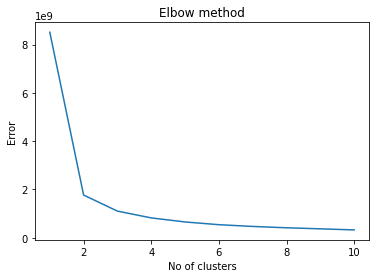

In [69]:
# Create an elbow plot for cluster determination
# NOTE: We don't want to overwrite `x` for this step
cluster_x = df.drop(['Name','state'], axis=1).values
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(cluster_x)
    kmeans.fit(cluster_x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Between 2 and 5 seems to be the elbow, so let's use **3**.

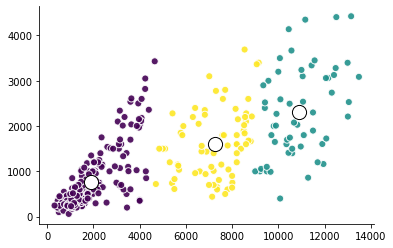

In [70]:
# Create clusters
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(cluster_x)
centers = kmeans.cluster_centers_

# Plot clusters
plt.scatter(cluster_x[:, 0], cluster_x[:, 1], c=y_kmeans, s=50, edgecolor='white', alpha=0.9, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='white', edgecolor='black', s=200)
sns.despine()
plt.show()

In [71]:
# Save the clusters in the dataframe
df['clusters'] = y_kmeans

Let's show where the resort is based on summit elevation and vertical drop

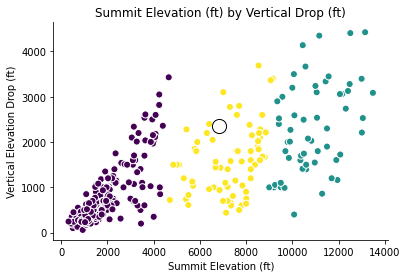

In [72]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label='clusters', edgecolors='white')
plt.scatter(whitefish_df['summit_elev'], whitefish_df['vertical_drop'], c='white', s=200, edgecolors='black')
plt.xlabel('Summit Elevation (ft)')
plt.ylabel('Vertical Elevation Drop (ft)')
plt.title('Summit Elevation (ft) by Vertical Drop (ft)')
sns.despine()
plt.savefig('figures/fig1.png', bbox_inches='tight')

Let's show where the resort is based on skiable area and ticket price

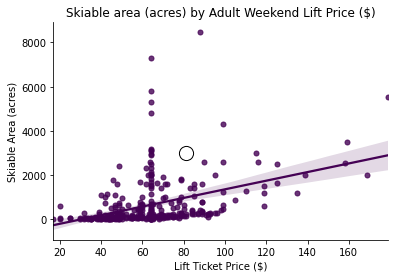

In [73]:
# https://github.com/andrewm4894/random/blob/master/GuidedCapstoneStep6-AnswerKey.ipynb
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df, color="#440154FF", scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=whitefish_df, c='white', s=200, edgecolors='black')
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Skiable Area (acres)')
plt.title('Skiable area (acres) by Adult Weekend Lift Price ($)')
sns.despine()
plt.savefig('figures/fig2.png',bbox_inches='tight')

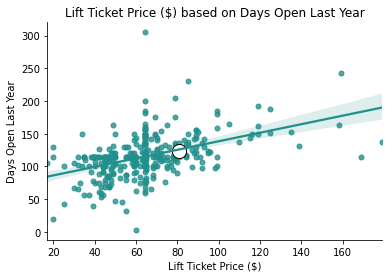

In [74]:
# https://github.com/andrewm4894/random/blob/master/GuidedCapstoneStep6-AnswerKey.ipynb
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=df, color ="#21908CFF", scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=whitefish_df, c='white',s=200,edgecolors='black')
plt.title('Lift Ticket Price ($) based on Days Open Last Year')
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
sns.despine()
plt.savefig('figures/fig3.png',bbox_inches='tight')

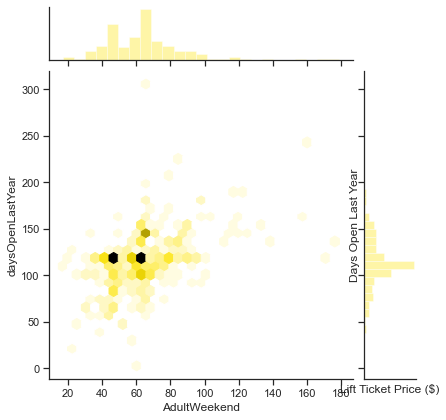

In [75]:
# https://github.com/andrewm4894/random/blob/master/GuidedCapstoneStep6-AnswerKey.ipynb
sns.set(style="ticks")
sns.jointplot(x=df['AdultWeekend'], y=df['daysOpenLastYear'], kind="hex", color="#FDE725FF")
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
sns.despine()
plt.savefig('figures/fig4.png',bbox_inches='tight')

### Present and share your findings - Storytelling

### Finalize Code

In [76]:
# NOTE: These are redundant, but good examples
import pickle
filehandler = open('models/regression_model_adultweekend.obj', 'wb')
pickle.dump(model, filehandler)
filehandler.close()

# from joblib import dump
# dump(lr_model, 'models/regression_model_adultweekend.joblib') 

### Finalize Documentation

In [77]:
coeff_df = pd.DataFrame(abs(model.coef_), x.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('models/model_metrics.csv')